# Data Wrangling

# Imports

In [1]:
import pandas as pd
import requests
import math
from scipy import stats
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives

- Data Collection
    - Goal: Organize your data to streamline the next steps of your capstone
        - Data loading
        - Data joining
        - Hint: Data Collection will require the use of the pandas library, and functions like read_csv(), depending on the type of data you want to read in!
        - Hint: when adding one dataset to another, make sure you use the right function: you might want to merge, join, or concatenate.
- Data Organization
    - Goal: Create a file structure and add your work to the GitHub repository you’ve created for this project.
        - File structure
        - GitHub
        - Hint: the glob library could come in handy here…
        - Remind yourself of why GitHub is useful. What are the main motivations for making a GitHub repository?
- Data Definition
    - Goal: Gain an understanding of your data features to inform the next steps of your project.
        - Column names
        - Data types
        - Description of the columns
        - Counts and percents unique values
        - Ranges of values
- Hint: here are some useful questions to ask yourself during this process:
    - Do your column names correspond to what those columns store?
    - Check the data types of your columns. Are they sensible?
    - Calculate summary statistics for each of your columns, such as mean, median, mode, standard deviation, range, and number of unique values. What does this tell you about your data? What do you now need to investigate?
- Data Cleaning
    - Goal: Clean up the data in order to prepare it for the next steps of your project.
        - NA or missing values
        - Duplicates
- Hint: don’t forget about the following awesome Python functions for data cleaning, which make life a whole lot easier:
    - loc[] - filter your data by label
    - iloc[] - filter your data by indexes
    - apply() - execute a function across an axis of a DataFrame
    - drop() - drop columns from a DataFrame
    - is_unique() - check if a column is a unique identifier
    - Series methods, such as str.contains(), which can be used to check if a certain substring occurs in a string of a Series, and str.extract(), which can be used to extract capture groups with a certain regex (or regular expression) pattern
    - numPy methods like .where(), to clean columns. Recall that such methods have the structure: np.where(condition, then, else)
    - DataFrame methods to check for null values, such as df.isnull().values.any()

# Data Collection

## Loading the data

In [2]:
stroke_data = pd.read_csv('stroke prediction/healthcare-dataset-stroke-data.csv')

# Data defintion and understanding the data

In [3]:
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning

## Number of missing values by column

In [7]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


## Filling missing BMI data with median BMI based on age

In [8]:
bmi_tables = pd.read_html('https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/')
len(bmi_tables)

4

In [9]:
child_bmi = bmi_tables[0]
adult_bmi = bmi_tables[1]
print(child_bmi)

           0                    1           2                    3  \
0  Age Range  25th Percentile BMI  Median BMI  75th Percentile BMI   
1        2-3                 15.6        16.3                 17.2   
2        4-5                 15.3        16.1                 17.3   
3        6-7                 15.0        16.1                 18.4   
4        8-9                 15.8        17.3                 19.8   
5      10-11                 16.8        19.2                 22.4   
6      12-13                 18.2        20.6                 25.1   
7      14-15                 19.4        22.0                 25.6   
8      16-17                 21.2        24.1                 27.8   

             4  
0  Average BMI  
1         16.5  
2         16.5  
3         17.2  
4         18.3  
5         20.2  
6         22.0  
7         23.4  
8         25.3  


In [10]:
child_bmi.columns = child_bmi.iloc[0]
child_bmi = child_bmi[1:]
adult_bmi.columns = adult_bmi.iloc[0]
adult_bmi = adult_bmi[1:]

In [11]:
child_bmi = child_bmi.set_index('Age Range')
adult_bmi = adult_bmi.set_index('Age Range')

In [12]:
child_bmi = child_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)
adult_bmi = adult_bmi.drop(['25th Percentile BMI', '75th Percentile BMI', 'Average BMI'], axis=1)

In [13]:
median_bmi = child_bmi.append(adult_bmi)

In [14]:
print(median_bmi)

0         Median BMI
Age Range           
2-3             16.3
4-5             16.1
6-7             16.1
8-9             17.3
10-11           19.2
12-13           20.6
14-15           22.0
16-17           24.1
18-24           25.5
25-29           26.4
30-34           28.1
35-39           29.0
40-44           29.1
45-49           28.6
50-54           29.1
55-59           29.2
60-64           28.9
65-69           29.0
70-74           28.6
75+             27.5


In [15]:
def fill_bmi(arr):
    for index, row in arr.iterrows():
        if pd.isna(row['bmi']):
            if row['age'] <= 3:
                arr.iloc[index, 9] = median_bmi.iloc[0][0]
            elif row['age'] >= 4 and row['age'] <= 5:
                arr.iloc[index, 9] = median_bmi.iloc[1][0]
            elif row['age'] >= 6 and row['age'] <= 7:
                arr.iloc[index, 9] = median_bmi.iloc[2][0]
            elif row['age'] >= 8 and row['age'] <= 9:
                arr.iloc[index, 9] = median_bmi.iloc[3][0]
            elif row['age'] >= 10 and row['age'] <= 11:
                arr.iloc[index, 9] = median_bmi.iloc[4][0]
            elif row['age'] >= 12 and row['age'] <= 13:
                arr.iloc[index, 9] = median_bmi.iloc[5][0]
            elif row['age'] >= 14 and row['age'] <= 15:
                arr.iloc[index, 9] = median_bmi.iloc[6][0]
            elif row['age'] >= 16 and row['age'] <= 17:
                arr.iloc[index, 9] = median_bmi.iloc[7][0]
            elif row['age'] >= 18 and row['age'] <= 24:
                arr.iloc[index, 9] = median_bmi.iloc[8][0]
            elif row['age'] >= 25 and row['age'] <= 29:
                arr.iloc[index, 9] = median_bmi.iloc[9][0]
            elif row['age'] >= 30 and row['age'] <= 34:
                arr.iloc[index, 9] = median_bmi.iloc[10][0]
            elif row['age'] >= 35 and row['age'] <= 39:
                arr.iloc[index, 9] = median_bmi.iloc[11][0]
            elif row['age'] >= 40 and row['age'] <= 44:
                arr.iloc[index, 9] = median_bmi.iloc[12][0]
            elif row['age'] >= 45 and row['age'] <= 49:
                arr.iloc[index, 9] = median_bmi.iloc[13][0]
            elif row['age'] >= 50 and row['age'] <= 54:
                arr.iloc[index, 9] = median_bmi.iloc[14][0]
            elif row['age'] >= 55 and row['age'] <= 59:
                arr.iloc[index, 9] = median_bmi.iloc[15][0]
            elif row['age'] >= 60 and row['age'] <= 64:
                arr.iloc[index, 9] = median_bmi.iloc[16][0]
            elif row['age'] >= 65 and row['age'] <= 69:
                arr.iloc[index, 9] = median_bmi.iloc[17][0]
            elif row['age'] >= 70 and row['age'] <= 74:
                arr.iloc[index, 9] = median_bmi.iloc[18][0]
            elif row['age'] >= 75:
                arr.iloc[index, 9] = median_bmi.iloc[19][0]

In [16]:
fill_bmi(stroke_data)

In [17]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   object 
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 479.2+ KB


In [18]:
missing = pd.concat([stroke_data.isnull().sum(), 100 * stroke_data.isnull().mean()], axis=1)
missing.columns=['count', 'percentages']
missing.sort_values(by=['count'])

,count,percentages
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0
bmi,0,0.0


### Let's set the index to the ID column

In [19]:
stroke_data = stroke_data.set_index('id')
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


### find duplicates

In [20]:
duplicates = stroke_data[stroke_data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


### find extreme outliers

In [21]:
stroke_data.select_dtypes('number')

,age,hypertension,heart_disease,avg_glucose_level,stroke
id,,,,,
9046,67.0,0,1,228.69,1
51676,61.0,0,0,202.21,1
31112,80.0,0,1,105.92,1
60182,49.0,0,0,171.23,1
1665,79.0,1,0,174.12,1
...,...,...,...,...,...
18234,80.0,1,0,83.75,0
44873,81.0,0,0,125.20,0
19723,35.0,0,0,82.99,0


In [22]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   object 
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 479.1+ KB


### convert BMI to float

In [23]:
stroke_data['bmi'] = stroke_data['bmi'].astype(float)

In [24]:
z = np.abs(stats.zscore(stroke_data[['age', 'avg_glucose_level', 'bmi']]))
print(np.where(z > 3))

(array([  33,   45,  113,  122,  123,  135,  193,  196,  220,  243,  256,
        258,  270,  303,  330,  333,  358,  386,  430,  466,  544,  552,
        637,  662,  672,  715,  755,  761,  785,  805,  928, 1061, 1067,
       1070, 1077, 1113, 1207, 1304, 1322, 1384, 1436, 1453, 1529, 1532,
       1559, 1564, 1584, 1595, 1626, 1660, 1898, 2071, 2081, 2128, 2136,
       2182, 2203, 2293, 2330, 2441, 2462, 2494, 2545, 2555, 2567, 2633,
       2693, 2751, 2764, 2815, 2840, 3060, 3088, 3215, 3243, 3342, 3393,
       3508, 3588, 3606, 3688, 3702, 3825, 3909, 3931, 3980, 4048, 4154,
       4188, 4209, 4225, 4249, 4283, 4351, 4356, 4407, 4447, 4457, 4470,
       4475, 4598, 4711, 4838, 4906, 4909, 4952, 4983, 5034], dtype=int64), array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2

In [25]:
stroke_data[stroke_data['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [26]:
stroke_data[stroke_data['avg_glucose_level'] > 300]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,


In [27]:
mean_bmi = stroke_data['bmi'].mean()
std_bmi = stroke_data['bmi'].std()
cut_off = std_bmi * 3
lower, upper = mean_bmi - cut_off, mean_bmi + cut_off

stroke_data[np.abs(stroke_data['bmi']) > upper]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
53144,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0


### We will leave in the outliers. BMI and glucose levels seem to have a lot of variability/spread in the general population.

## Categorical features

In [28]:
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
id,,,,,
9046,Male,Yes,Private,Urban,formerly smoked
51676,Female,Yes,Self-employed,Rural,never smoked
31112,Male,Yes,Private,Rural,never smoked
60182,Female,Yes,Private,Urban,smokes
1665,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
18234,Female,Yes,Private,Urban,never smoked
44873,Female,Yes,Self-employed,Urban,never smoked
19723,Female,Yes,Self-employed,Rural,never smoked


### find unique categorical values

In [29]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since we have just one "other", we can safely drop this so that the gender column is clean. If there were multiple "others" that might perhaps represent transgender or non-gender conforming individuals, we might want to consider if this in its own right can help predict stroke.

In [30]:
stroke_data.drop(stroke_data[stroke_data['gender'] == 'Other'].index, inplace = True)

In [31]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [32]:
stroke_data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [33]:
stroke_data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [34]:
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [35]:
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

# EDA

In [36]:
stroke_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.332060,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.159937,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038370,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167550,0.131991
bmi,0.332060,0.159937,0.038370,0.167550,1.000000,0.036040
stroke,0.245239,0.127891,0.134905,0.131991,0.036040,1.000000


<AxesSubplot:>

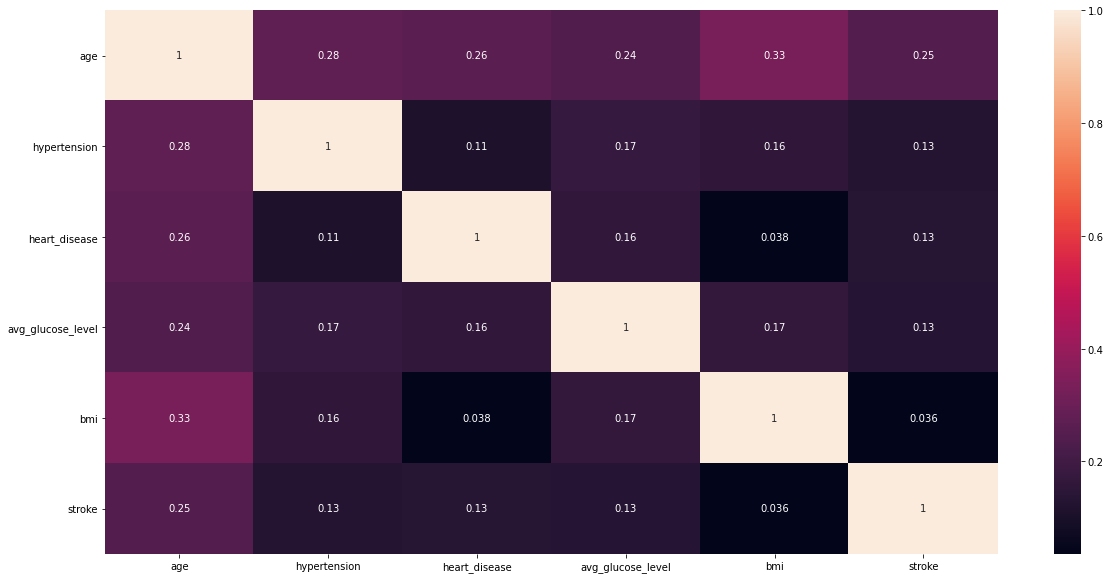

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(stroke_data.corr(), annot=True)

The findings from the EDA revealed that strongest correlation with stroke is age. This is not surprising, as age is a well known risk factor for stroke. Other relatively strong correlations are with heart disease, hypertension and average glucose level. Surprisingly, bmi had a lower correlation than many others.

### let's check out some stroke vs non-stroke distributions

## ******add a plot showing the disparity in stroke vs non stroke, which might require us to use a special technique to account for. 

#### by age

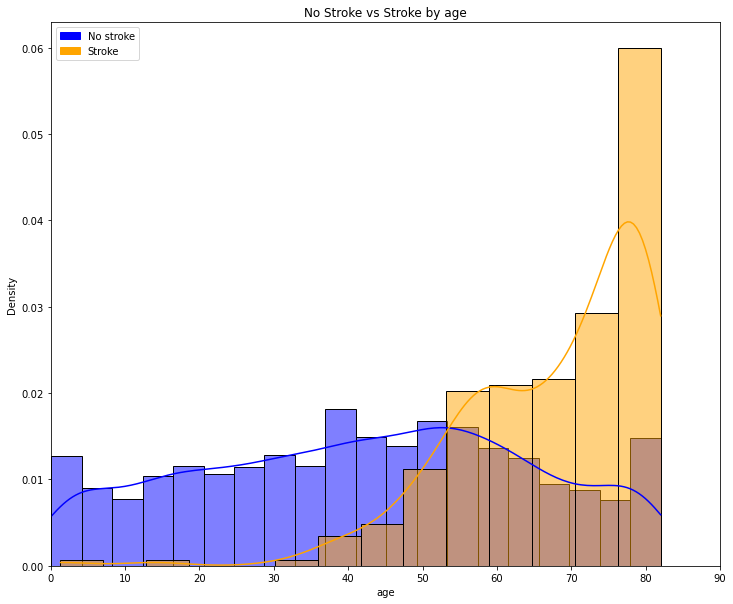

In [38]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['age'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['age'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by age')
plt.xlim([0,90])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

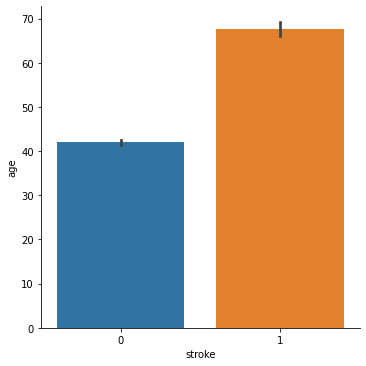

In [39]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='age', data=stroke_data, kind='bar')

we can easily see these are different distributions, but age is already a well established risk factor for stroke. So we may want to consider this when building our model. 

#### by avg glucose level

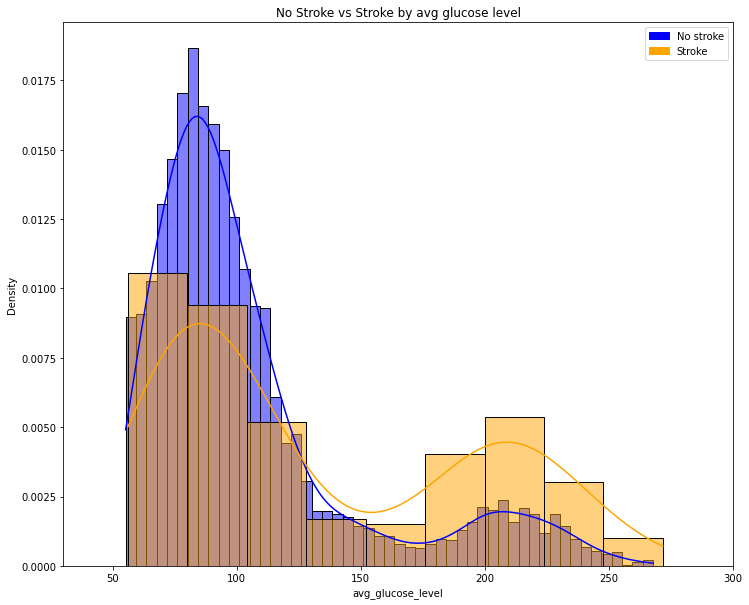

In [40]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['avg_glucose_level'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['avg_glucose_level'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by avg glucose level')
plt.xlim([30,300])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

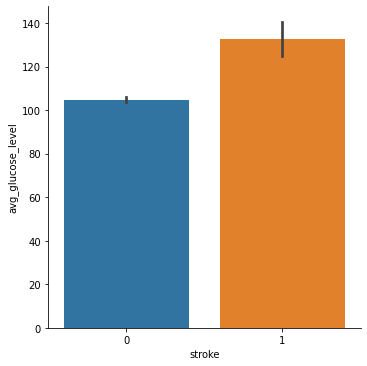

In [41]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='avg_glucose_level', data=stroke_data, kind='bar')

#### by bmi

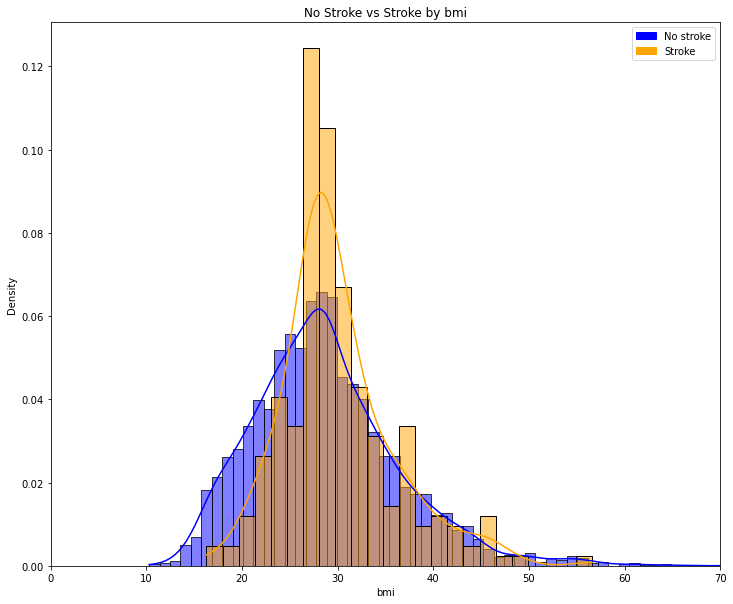

In [42]:
plt.figure(figsize=(12,10))

sns.histplot(stroke_data[stroke_data['stroke'] == 0]['bmi'], color='blue', stat='density', kde=True)
sns.histplot(stroke_data[stroke_data['stroke'] == 1]['bmi'], color='orange', stat='density', kde=True)

plt.title('No Stroke vs Stroke by bmi')
plt.xlim([0,70])
no_stroke_leg = mpatches.Patch(color='blue', label='No stroke')
stroke_leg = mpatches.Patch(color='orange', label='Stroke')
plt.legend(handles=[no_stroke_leg, stroke_leg])
plt.show()

<Figure size 864x720 with 0 Axes>

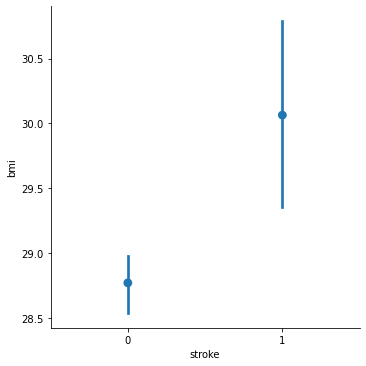

In [43]:
plt.figure(figsize=(12,10))

sns.catplot(x='stroke', y='bmi', data=stroke_data, kind='point', join=False)

### Visualizing the discrete variables 

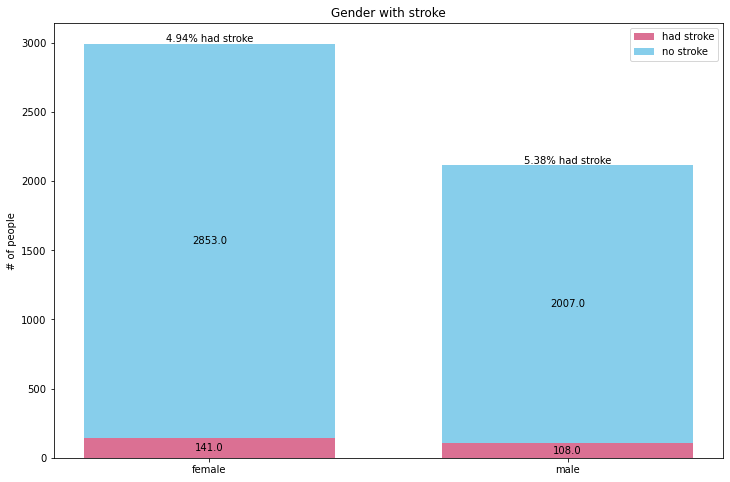

In [44]:
stroke = stroke_data[stroke_data['stroke'] == 1]['gender'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['gender'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['female', 'male'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Gender with stroke')
plt.legend()

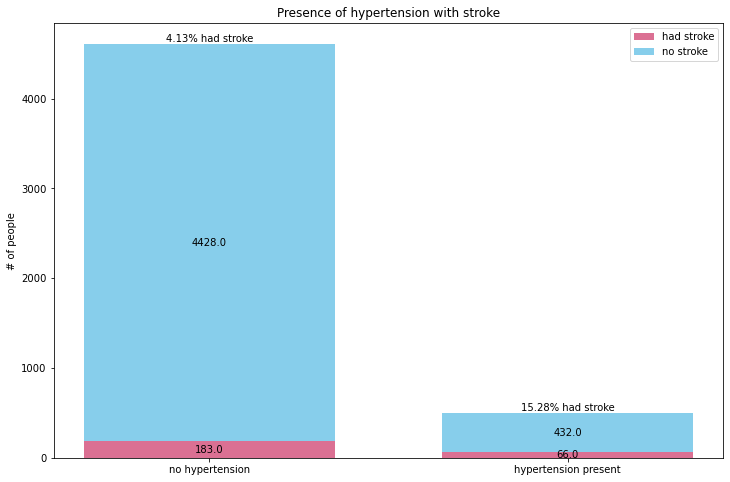

In [45]:
stroke = stroke_data[stroke_data['stroke'] == 1]['hypertension'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['hypertension'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no hypertension', 'hypertension present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Presence of hypertension with stroke')
plt.legend()

A pretty sizable difference, but with low numbers it may not be significant.

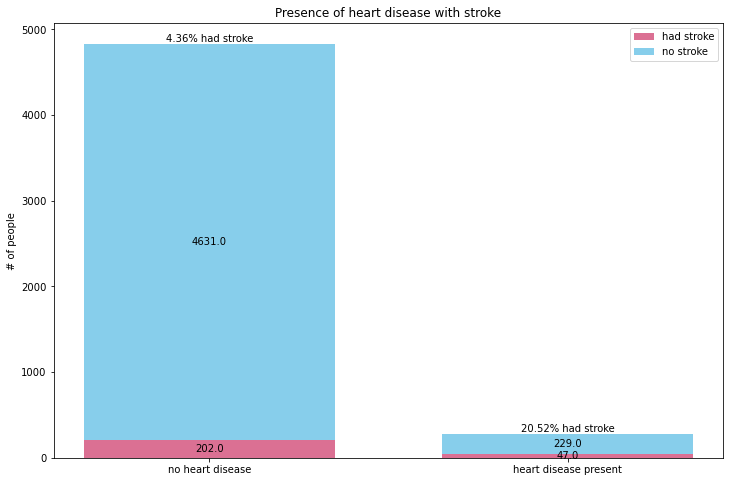

In [46]:
stroke = stroke_data[stroke_data['stroke'] == 1]['heart_disease'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['heart_disease'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['no heart disease', 'heart disease present'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Presence of heart disease with stroke')
plt.legend()

A pretty sizable difference, but again low numbers may not reveal a significant difference.

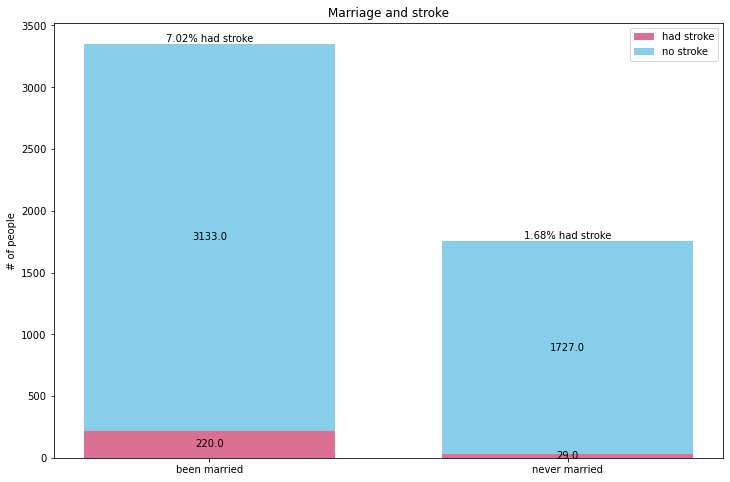

In [47]:
stroke = stroke_data[stroke_data['stroke'] == 1]['ever_married'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['ever_married'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['been married', 'never married'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Marriage and stroke')
plt.legend()

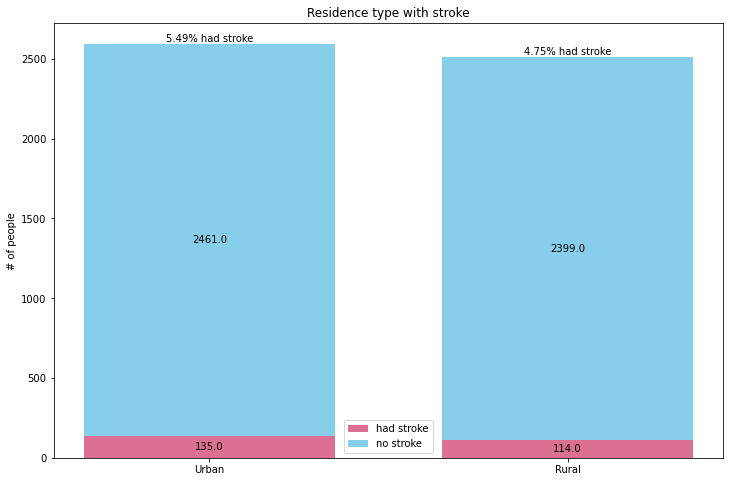

In [48]:
stroke = stroke_data[stroke_data['stroke'] == 1]['Residence_type'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['Residence_type'].value_counts()

x = np.arange(2)
plt.figure(figsize=[12,8])
plt.xticks(x/2, ['Urban', 'Rural'])
plt.bar(x/2, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x/2, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x/2, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x/2, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x/2, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Residence type with stroke')
plt.legend()

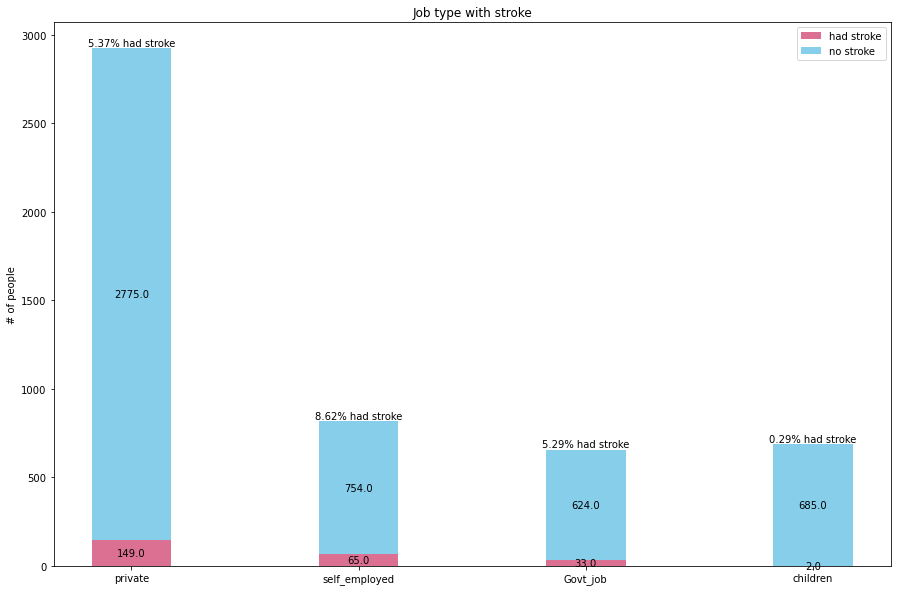

In [49]:
stroke = stroke_data[stroke_data['stroke'] == 1]['work_type'].value_counts()
no_stroke = stroke_data[(stroke_data['stroke'] == 0) & (stroke_data['work_type'] != 'Never_worked')]['work_type'].value_counts()
stroke = stroke[['Private', 'Self-employed', 'Govt_job', 'children']]
no_stroke = no_stroke[['Private', 'Self-employed', 'Govt_job', 'children']]

x = np.arange(4)
plt.figure(figsize=[15,10])
plt.xticks(x, ['private', 'self_employed', 'Govt_job', 'children'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, stroke+no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Job type with stroke')
plt.legend()

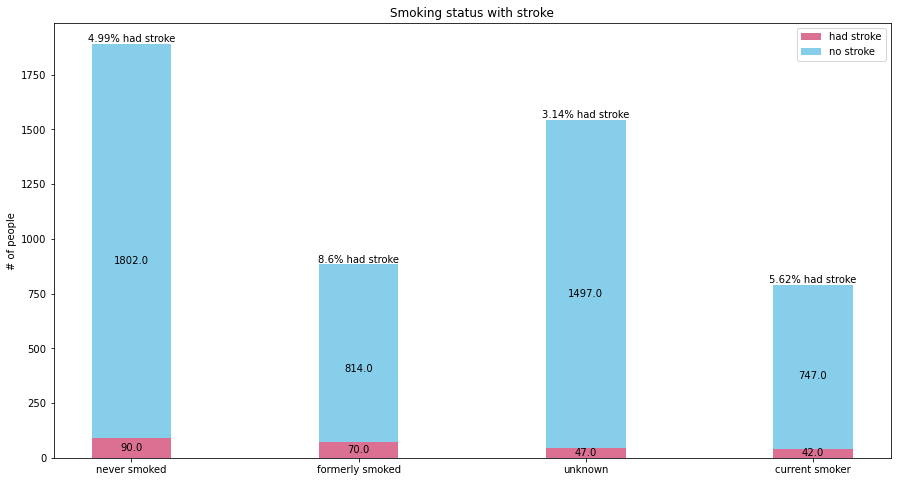

In [50]:
stroke = stroke_data[stroke_data['stroke'] == 1]['smoking_status'].value_counts()
no_stroke = stroke_data[stroke_data['stroke'] == 0]['smoking_status'].value_counts()
stroke = stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]
no_stroke = no_stroke[['never smoked', 'formerly smoked', 'Unknown','smokes']]

x = np.arange(4)
plt.figure(figsize=[15,8])
plt.xticks(x, ['never smoked', 'formerly smoked', 'unknown', 'current smoker'])
plt.bar(x, stroke, width=0.35, label='had stroke', color='palevioletred')
plt.bar(x, no_stroke, width=0.35, label='no stroke', color='skyblue', bottom=stroke)

# add text annotation corresponding to the values.
for xpos, ypos, yval in zip(x, stroke/2, stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, no_stroke/2, no_stroke):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
# add text annotation corresponding to the "percentage of stroke" value of each bar
for xpos, ypos, yval in zip(x, stroke+no_stroke, stroke/no_stroke*100):
    plt.text(xpos, ypos, str(round(yval, 2)) + '% had stroke', ha="center", va="bottom")
    
plt.ylabel('# of people')
plt.title('Smoking status with stroke')
plt.legend()

interesting that former smokers had a higher percentage of strokes than current smokers. Probably due to low numbers.

### Encoding

#### convert gender column to a binary column where 0 is male and 1 is female

In [51]:
conv_gen = pd.get_dummies(stroke_data['gender'])
conv_gen2 = pd.concat((conv_gen, stroke_data), axis=1)
conv_gen2 = conv_gen2.drop(['gender'], axis=1)
conv_gen2 = conv_gen2.drop(['Male'], axis=1)
stroke_bin_convert = conv_gen2.rename(columns={'Female': 'gender'})
print(stroke_bin_convert)

       gender   age  hypertension  heart_disease ever_married      work_type  \
id                                                                             
9046        0  67.0             0              1          Yes        Private   
51676       1  61.0             0              0          Yes  Self-employed   
31112       0  80.0             0              1          Yes        Private   
60182       1  49.0             0              0          Yes        Private   
1665        1  79.0             1              0          Yes  Self-employed   
...       ...   ...           ...            ...          ...            ...   
18234       1  80.0             1              0          Yes        Private   
44873       1  81.0             0              0          Yes  Self-employed   
19723       1  35.0             0              0          Yes  Self-employed   
37544       0  51.0             0              0          Yes        Private   
44679       1  44.0             0       

#### convert ever_married column to binary where Yes is 1 and No is 0

In [52]:
conv_mar = pd.get_dummies(stroke_bin_convert['ever_married'])
conv_mar2 = pd.concat((conv_mar, stroke_bin_convert), axis=1)
conv_mar2 = conv_mar2.drop(['ever_married'], axis=1)
conv_mar2 = conv_mar2.drop(['No'], axis=1)
stroke_bin_convert = conv_mar2.rename(columns={'Yes': 'ever_married'})

#### convert Residence_type to binary where urban is 1 and rural is 0

In [53]:
conv_res = pd.get_dummies(stroke_bin_convert['Residence_type'])
conv_res2 = pd.concat((conv_res, stroke_bin_convert), axis=1)
conv_res2 = conv_res2.drop(['Residence_type'], axis=1)
conv_res2 = conv_res2.drop(['Rural'], axis=1)
stroke_bin_convert = conv_res2.rename(columns={'Urban': 'Residence_type'})
stroke_bin_convert

,Residence_type,ever_married,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,1,0,67.0,0,1,Private,228.69,36.6,formerly smoked,1
51676,0,1,1,61.0,0,0,Self-employed,202.21,28.9,never smoked,1
31112,0,1,0,80.0,0,1,Private,105.92,32.5,never smoked,1
60182,1,1,1,49.0,0,0,Private,171.23,34.4,smokes,1
1665,0,1,1,79.0,1,0,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,1,1,80.0,1,0,Private,83.75,27.5,never smoked,0
44873,1,1,1,81.0,0,0,Self-employed,125.20,40.0,never smoked,0
19723,0,1,1,35.0,0,0,Self-employed,82.99,30.6,never smoked,0


In [54]:
stroke_bin_convert = stroke_bin_convert[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']]
stroke_bin_convert

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,1,80.0,1,0,1,Private,1,83.75,27.5,never smoked,0
44873,1,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
19723,1,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0


### preparing to convert more categorical data

In [55]:
#Create a new dataframe, `stroke_cat_convert` from `stroke_bin_convert`
stroke_cat_convert = stroke_bin_convert
#Save the index just in case
stroke_cat_index = stroke_cat_convert.index
#Save the column names (using the `columns` attribute) just in case
stroke_cat_columns = stroke_cat_convert.columns
stroke_cat_convert.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
51676,1,61.0,0,0,1,Self-employed,0,202.21,28.9,never smoked,1
31112,0,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
60182,1,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


#### convert work_type and smoking_status categorical data into numeric values

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [57]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [5,9])], remainder= 'passthrough')
stroke_full_convert = np.array(ct.fit_transform(stroke_cat_convert))

In [58]:
stroke_cat_columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [59]:
added_cols = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Uknown', 'formerly smoked', 'never smoked', 'smokes', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

In [60]:
stroke_df = pd.DataFrame(stroke_full_convert, columns = added_cols)

In [61]:
stroke_df

,Govt_job,Never_worked,Private,Self-employed,children,Uknown,formerly smoked,never smoked,smokes,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,61.0,0.0,0.0,1.0,0.0,202.21,28.9,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,80.0,1.0,0.0,1.0,1.0,83.75,27.5,0.0
5105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0,0.0
5106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6,0.0
5107,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6,0.0


#### now for x the first 5 columns are work type and the following 4 are smoking status. Then it's gender, age, hypertension, heart_disease, ever_married, Residence_type, avg_glucose_level, bmi. 

## Train Test Split

In [62]:
X = stroke_df.iloc[:, :-1].values
y = stroke_df.iloc[:, -1].values

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Applying SMOTE (over sampling) technique for imbalanced classes

In [64]:
print('Before applying SMOTE, stroke counts on y: {}'.format(sum(y_train==1)))
print('Before applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train==0)))

Before applying SMOTE, stroke counts on y: 169
Before applying SMOTE, : non-stroke counts on y: 3662


In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train, y_train)

In [66]:
print('After applying SMOTE, stroke counts on y: {}'.format(sum(y_train_os==1)))
print('After applying SMOTE, : non-stroke counts on y: {}'.format(sum(y_train_os==0)))

After applying SMOTE, stroke counts on y: 3662
After applying SMOTE, : non-stroke counts on y: 3662


## Scaling

In [67]:
#Save the column names (using the `columns` attribute) of `stroke_scale` into the variable 'stroke_columns'
stroke_df_cols = stroke_df.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_os)
X_test = scaler.transform(X_test)

In [68]:
X_train = pd.DataFrame(X_train, columns=stroke_df_cols[:-1])
X_test = pd.DataFrame(X_test, columns=stroke_df_cols[:-1])

In [69]:
y_train = y_train_os

## verify the scaling is correct with mean and std

In [70]:
X_train.mean()

Govt_job            -6.339519e-16
Never_worked        -3.466614e-15
Private              1.398769e-15
Self-employed       -2.380401e-15
children            -1.031768e-14
Uknown               1.912027e-15
formerly smoked      1.907487e-15
never smoked        -6.352404e-16
smokes              -6.746227e-16
gender              -1.688527e-15
age                  8.563527e-16
hypertension         1.100355e-14
heart_disease        1.027517e-14
ever_married         1.223313e-14
Residence_type       1.672838e-16
avg_glucose_level    6.658640e-15
bmi                 -1.469948e-14
dtype: float64

In [71]:
X_train.std(ddof=0)

Govt_job             1.0
Never_worked         1.0
Private              1.0
Self-employed        1.0
children             1.0
Uknown               1.0
formerly smoked      1.0
never smoked         1.0
smokes               1.0
gender               1.0
age                  1.0
hypertension         1.0
heart_disease        1.0
ever_married         1.0
Residence_type       1.0
avg_glucose_level    1.0
bmi                  1.0
dtype: float64

# Models

#### We will be using the following:
XGBoost,
BernoullliNB,
GausianNB,
LogisticRegression,
DecisionTree,
RandomForest,
SVC,
KNN,
LGBMClassifier

In [72]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, roc_curve, recall_score, f1_score, classification_report, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve


In [73]:
column_score_names = ['Model', 'Accuracy', 'K-Fold Accuracy Mean', 'Standard Deviation', 'ROC', 'Precision', 'Recall', 'F1']
model_scores = pd.DataFrame()

In [74]:
models = []

In [75]:
xgboost = XGBClassifier(eval_metric='error')
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= XGBClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

xgboost_arr = pd.Series(['XGBoost',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(xgboost_arr, ignore_index=True)
print(cm)

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:20:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1188   10]
 [  76    4]]


In [76]:
bern = BernoulliNB()
bern.fit(X_train, y_train)

y_pred = bern.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= BernoulliNB(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

bern_arr = pd.Series(['BernoulliNB',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(bern_arr, ignore_index=True)
print(cm)

[[872 326]
 [ 17  63]]


In [77]:
gaus = GaussianNB()
gaus.fit(X_train, y_train)

y_pred = gaus.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= GaussianNB(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

gaus_arr = pd.Series(['GaussianNB',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(gaus_arr, ignore_index=True)
print(cm)

[[244 954]
 [  0  80]]


In [78]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= LogisticRegression(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lr_arr = pd.Series(['Logistic Regression',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(lr_arr, ignore_index=True)
print(cm)

[[897 301]
 [ 23  57]]


In [79]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= SVC(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

svm_arr = pd.Series(['SVM',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(svm_arr, ignore_index=True)
print(cm)

[[1150   48]
 [  67   13]]


In [80]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= DecisionTreeClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

dtc_arr = pd.Series(['Decision Tree Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(dtc_arr, ignore_index=True)
print(cm)

[[1133   65]
 [  68   12]]


In [81]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= RandomForestClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rf_arr = pd.Series(['Random Forest Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(rf_arr, ignore_index=True)
print(cm)

[[1192    6]
 [  75    5]]


In [82]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= KNeighborsClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

knn_arr = pd.Series(['KNeighbors Classifier',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(knn_arr, ignore_index=True)
print(cm)

[[1065  133]
 [  56   24]]


In [83]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = cross_val_score(estimator= LGBMClassifier(), X = X_train, y = y_train, cv =5)
roc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

lgbm_arr = pd.Series(['LGBM',
                         (accuracy_score(y_test, y_pred))*100,
                         accuracy.mean()*100,
                         accuracy.std()*100,
                         roc,
                         precision,
                         recall,
                         f1])
model_scores = model_scores.append(lgbm_arr, ignore_index=True)
print(cm)

[[1194    4]
 [  76    4]]


In [84]:
model_scores.columns = column_score_names
model_scores = model_scores.set_index('Model')
model_scores

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
XGBoost,93.270736,96.955519,4.251488,0.520826,0.285714,0.0500,0.085106
BernoulliNB,73.161189,76.064968,0.752963,0.757690,0.161954,0.7875,0.268657
GaussianNB,25.352113,59.557647,0.233670,0.601836,0.077369,1.0000,0.143627
Logistic Regression,74.647887,78.672859,0.748408,0.730624,0.159218,0.7125,0.260274
SVM,91.001565,93.118577,2.262658,0.561217,0.213115,0.1625,0.184397
Decision Tree Classifier,89.593114,94.948367,3.219683,0.547871,0.155844,0.1500,0.152866
Random Forest Classifier,93.661972,97.351452,4.310237,0.528746,0.454545,0.0625,0.109890
KNeighbors Classifier,85.211268,93.541814,0.445264,0.594491,0.152866,0.3000,0.202532
LGBM,93.740219,97.078377,4.205827,0.523331,0.500000,0.0500,0.090909


In [86]:
model_scores.sort_values(by='K-Fold Accuracy Mean', ascending=False)

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
Random Forest Classifier,93.661972,97.351452,4.310237,0.528746,0.454545,0.0625,0.109890
LGBM,93.740219,97.078377,4.205827,0.523331,0.500000,0.0500,0.090909
XGBoost,93.270736,96.955519,4.251488,0.520826,0.285714,0.0500,0.085106
Decision Tree Classifier,89.593114,94.948367,3.219683,0.547871,0.155844,0.1500,0.152866
KNeighbors Classifier,85.211268,93.541814,0.445264,0.594491,0.152866,0.3000,0.202532
SVM,91.001565,93.118577,2.262658,0.561217,0.213115,0.1625,0.184397
Logistic Regression,74.647887,78.672859,0.748408,0.730624,0.159218,0.7125,0.260274
BernoulliNB,73.161189,76.064968,0.752963,0.757690,0.161954,0.7875,0.268657
GaussianNB,25.352113,59.557647,0.233670,0.601836,0.077369,1.0000,0.143627


In [151]:
model_scores.sort_values(by='Recall', ascending=False)

,Accuracy,K-Fold Accuracy Mean,Standard Deviation,ROC,Precision,Recall,F1
Model,,,,,,,
GaussianNB,25.352113,59.557647,0.233670,0.601836,0.077369,1.0000,0.143627
BernoulliNB,73.161189,76.064968,0.752963,0.757690,0.161954,0.7875,0.268657
Logistic Regression,74.647887,78.672859,0.748408,0.730624,0.159218,0.7125,0.260274
KNeighbors Classifier,85.211268,93.541814,0.445264,0.594491,0.152866,0.3000,0.202532
SVM,91.001565,93.118577,2.262658,0.561217,0.213115,0.1625,0.184397
Decision Tree Classifier,89.593114,94.948367,3.219683,0.547871,0.155844,0.1500,0.152866
Random Forest Classifier,93.661972,97.351452,4.310237,0.528746,0.454545,0.0625,0.109890
XGBoost,93.270736,96.955519,4.251488,0.520826,0.285714,0.0500,0.085106
LGBM,93.740219,97.078377,4.205827,0.523331,0.500000,0.0500,0.090909


We can see that Random Forest and LGBM got excellent accuracy scores. However, for our purposes we also want to consider recall because it is better to have more true positives of stroke risk even if it leads to more false positives as well. So we might look for a model that has a good balance. Perhaps we want to consider Bernoulli NB, Logistic Regression and KNeighbors. 

   ## possibly add keras ANN

# Parameter tuning focusing on Accuracy

In [88]:
from sklearn.model_selection import GridSearchCV

In [90]:
GridSearch_col_names = ['Model', 'Best Accuracy', 'Best Parameters']
GridSearch_acc = pd.DataFrame()

gridsearch_models = [('XGBClassifier', XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]),
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}]),
        ('Logistic Regression', LogisticRegression(), [{'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}]),
        ('SVM', SVC(), [{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf']}]),
        ('Decision Tree Classifier', DecisionTreeClassifier(), [{'criterion':['gini','entropy']}]),
        ('Random Forest Classifier', RandomForestClassifier(), [{'n_estimators':[80,100,150,200,300, 500],'criterion': ['gini','entropy']}]),
        ('KNeighbors Classifier', KNeighborsClassifier(), [{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
        ('LGBM Classifier', LGBMClassifier(), [{'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10)}])
       ]

for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'accuracy', cv=5)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    model_w_scores = pd.Series([j, best_accuracy * 100, best_param])
    GridSearch_acc = GridSearch_acc.append(model_w_scores, ignore_index=True)
GridSearch_acc.columns = GridSearch_col_names
GridSearch_acc = GridSearch_acc.set_index('Model')
GridSearch_acc

C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rotzn\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

,Best Accuracy,Best Parameters
Model,,
XGBClassifier,97.187620,"{'eval_metric': 'error', 'learning_rate': 0.1}"
BernoulliNB,76.064968,{'alpha': 0.5}
GaussianNB,72.064483,{'var_smoothing': 0.0533669923120631}
Logistic Regression,79.027835,"{'C': 0.01, 'penalty': 'l2'}"
SVM,93.118577,"{'C': 1, 'kernel': 'rbf'}"
Decision Tree Classifier,95.002993,{'criterion': 'gini'}
Random Forest Classifier,97.447015,"{'criterion': 'gini', 'n_estimators': 150}"
KNeighbors Classifier,96.245268,"{'metric': 'manhattan', 'n_neighbors': 3}"
LGBM Classifier,97.187601,"{'n_estimators': 200, 'num_leaves': 40}"


In [91]:
GridSearch_acc.sort_values(by='Best Accuracy', ascending=False)

,Best Accuracy,Best Parameters
Model,,
Random Forest Classifier,97.447015,"{'criterion': 'gini', 'n_estimators': 150}"
XGBClassifier,97.187620,"{'eval_metric': 'error', 'learning_rate': 0.1}"
LGBM Classifier,97.187601,"{'n_estimators': 200, 'num_leaves': 40}"
KNeighbors Classifier,96.245268,"{'metric': 'manhattan', 'n_neighbors': 3}"
Decision Tree Classifier,95.002993,{'criterion': 'gini'}
SVM,93.118577,"{'C': 1, 'kernel': 'rbf'}"
Logistic Regression,79.027835,"{'C': 0.01, 'penalty': 'l2'}"
BernoulliNB,76.064968,{'alpha': 0.5}
GaussianNB,72.064483,{'var_smoothing': 0.0533669923120631}


In [92]:
GridSearch_col_names = ['Model', 'Best Accuracy', 'Best Parameters']
GridSearch_rfc = pd.DataFrame()

gridsearch_models = [('Random Forest Classifier', RandomForestClassifier(),
                      [{'n_estimators':[80,100,150,200,300, 1000],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': ['auto', 'sqrt'],
                        'bootstrap': [True, False],
                        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                        'criterion':['gini','entropy']}])]

for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'accuracy', cv=5)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    model_w_scores = pd.Series([j, best_accuracy * 100, best_param])
    GridSearch_rfc = GridSearch_rfc.append(model_w_scores, ignore_index=True)
GridSearch_rfc.columns = GridSearch_col_names
GridSearch_rfc = GridSearch_rfc.set_index('Model')
GridSearch_rfc

,Best Accuracy,Best Parameters
Model,,
Random Forest Classifier,97.528954,"{'bootstrap': False, 'criterion': 'entropy', '..."


In [101]:
GridSearch_rfc['Best Parameters'][0]

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 100}

### For accuracy, this is the best we get from Random Forest. We can model below

## Let's find hyperparameters based on recall and f1 score considering the imbalanced data and our desire to maximize catching true positives. We shall explore Bernoulli NB, Gaussian NB, Logistic Regression and KNeighbors.

In [155]:
GridSearch_f1_cols = ['Model', 'Best f1 score', 'Best Parameters']
GridSearch_f1 = pd.DataFrame()

gridsearch_models = [
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]),
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}]),
        ('Logistic Regression', LogisticRegression(), [{'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}]),
        ('KNeighbors Classifier', KNeighborsClassifier(), [{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'f1', cv=5)
    grid.fit(X_train, y_train)
    best_f1 = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_f1, best_param])
    GridSearch_f1 = GridSearch_f1.append(model_w_scores, ignore_index=True)
GridSearch_f1.columns = GridSearch_f1_cols
GridSearch_f1 = GridSearch_f1.set_index('Model')

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [158]:
GridSearch_f1.sort_values(by='Best f1 score', ascending=False)

,Best f1 score,Best Parameters
Model,,
KNeighbors Classifier,0.963376,"{'metric': 'manhattan', 'n_neighbors': 3}"
Logistic Regression,0.798172,"{'C': 0.01, 'penalty': 'l2'}"
GaussianNB,0.776216,{'var_smoothing': 0.0533669923120631}
BernoulliNB,0.765800,{'alpha': 0.5}


In [162]:
GridSearch_recall_cols = ['Model', 'Best recall score', 'Best Parameters']
GridSearch_recall = pd.DataFrame()

gridsearch_models = [
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]),
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)}]),
        ('Logistic Regression', LogisticRegression(), [{'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}]),
        ('KNeighbors Classifier', KNeighborsClassifier(), [{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'recall', cv=5)
    grid.fit(X_train, y_train)
    best_recall = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_recall, best_param])
    GridSearch_recall = GridSearch_recall.append(model_w_scores, ignore_index=True)
GridSearch_recall.columns = GridSearch_recall_cols
GridSearch_recall = GridSearch_recall.set_index('Model')

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\rotzn\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [163]:
GridSearch_recall.sort_values(by='Best recall score', ascending=False)

,Best recall score,Best Parameters
Model,,
KNeighbors Classifier,0.993717,"{'metric': 'euclidean', 'n_neighbors': 3}"
GaussianNB,0.988257,{'var_smoothing': 1.873817422860387e-09}
Logistic Regression,0.836694,"{'C': 0.001, 'penalty': 'l2'}"
BernoulliNB,0.782897,{'alpha': 0.01}


#### KNeighbors seems to be the clear winner here. Let's try to expand our hyperparameters to see if we can improve our f1 score even more

In [166]:
GridSearch_KNeigh_cols = ['Model', 'Best f1 score', 'Best Parameters']
GridSearch_KNeigh = pd.DataFrame()

gridsearch_models = [
        ('KNeighbors Classifier', KNeighborsClassifier(), [{
            'n_neighbors':list(range(1,30)), 
            'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
            'leaf_size': list(range(1,50)),
            'p':[1,2]
        }]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'f1', cv=5)
    grid.fit(X_train, y_train)
    best_f1 = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_f1, best_param])
    GridSearch_KNeigh = GridSearch_KNeigh.append(model_w_scores, ignore_index=True)
GridSearch_KNeigh.columns = GridSearch_KNeigh_cols
GridSearch_KNeigh = GridSearch_KNeigh.set_index('Model')
GridSearch_KNeigh

,Best f1 score,Best Parameters
Model,,
KNeighbors Classifier,0.974769,"{'leaf_size': 1, 'metric': 'manhattan', 'n_nei..."


In [167]:
GridSearch_KNeigh['Best Parameters'][0]

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 2, 'p': 1}

## Let's also try BernoulliNB and Gaussian NB for recall

In [177]:
GridSearch_bern_cols = ['Model', 'Best recall score', 'Best Parameters']
GridSearch_bern = pd.DataFrame()

gridsearch_models = [
        ('BernoulliNB', BernoulliNB(), [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]

        }]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'recall', cv=5)
    grid.fit(X_train, y_train)
    best_recall = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_recall, best_param])
    GridSearch_bern = GridSearch_bern.append(model_w_scores, ignore_index=True)
GridSearch_bern.columns = GridSearch_bern_cols
GridSearch_bern = GridSearch_bern.set_index('Model')
GridSearch_bern

,Best recall score,Best Parameters
Model,,
BernoulliNB,0.782897,{'alpha': 0.01}


In [194]:
GridSearch_gauss_cols = ['Model', 'Best recall score', 'Best Parameters']
GridSearch_gauss = pd.DataFrame()

gridsearch_models = [
        ('GaussianNB', GaussianNB(), [{'var_smoothing': np.logspace(0,-9, num=100)
        }]),
       ]


# add STD, precision, recall, and F1
for j, i, k in gridsearch_models:
    grid = GridSearchCV(estimator = i, param_grid = k, scoring = 'recall', cv=5)
    grid.fit(X_train, y_train)
    best_recall = grid.best_score_
    best_param = grid.best_params_
    
    model_w_scores = pd.Series([j, best_recall, best_param])
    GridSearch_gauss = GridSearch_gauss.append(model_w_scores, ignore_index=True)
GridSearch_gauss.columns = GridSearch_gauss_cols
GridSearch_gauss = GridSearch_gauss.set_index('Model')
GridSearch_gauss

,Best recall score,Best Parameters
Model,,
GaussianNB,0.988257,{'var_smoothing': 1.873817422860387e-09}


# *****Let's try to tinker with the hyperparameter grid search a bit more with Gaussian and Bernoulli NB

# Modeling

### RandomForest which had the highest accuracy

In [192]:
ranfor = RandomForestClassifier(n_estimators=50)
ranfor.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)
y_prob = ranfor.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1198
         1.0       0.50      0.05      0.09        80

    accuracy                           0.94      1278
   macro avg       0.72      0.52      0.53      1278
weighted avg       0.91      0.94      0.91      1278

ROC AUC score: 0.7907710767946577
Accuracy Score:  0.9374021909233177


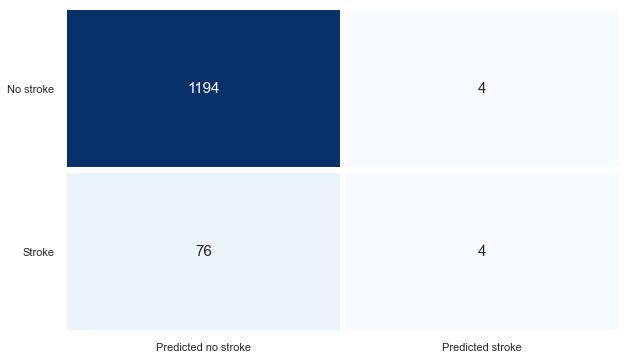

In [193]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

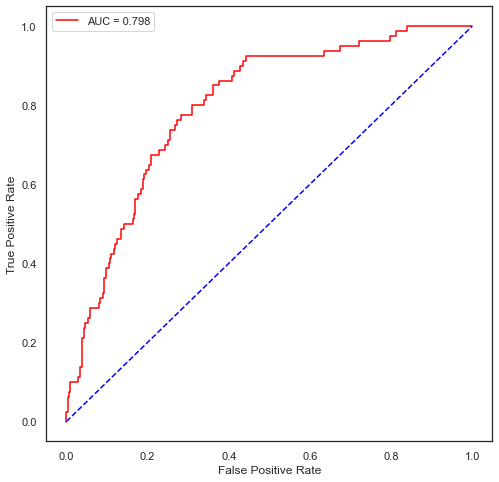

In [150]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'red', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## individual model evaluations based on best f1 score

In [174]:
KNeigh = KNeighborsClassifier(leaf_size=1, metric='manhattan',n_neighbors=2, p=1)
KNeigh.fit(X_train, y_train)
y_pred = KNeigh.predict(X_test)
y_prob = KNeigh.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1198
         1.0       0.15      0.07      0.10        80

    accuracy                           0.91      1278
   macro avg       0.54      0.52      0.53      1278
weighted avg       0.89      0.91      0.90      1278

ROC AUC score: 0.5627191151919866
Accuracy Score:  0.9147104851330203


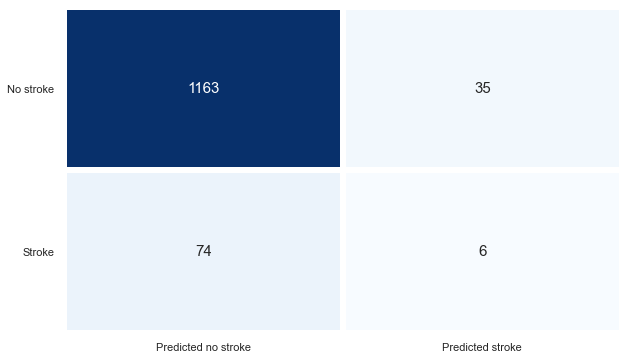

In [175]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

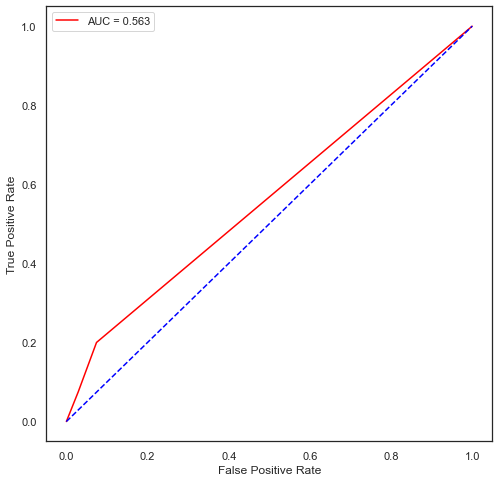

In [176]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'red', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## model evals focusing on recall

### Bernoulli NB

In [180]:
bern = BernoulliNB(alpha=0.01)
bern.fit(X_train, y_train)
y_pred = bern.predict(X_test)
y_prob = bern.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84      1198
         1.0       0.16      0.79      0.27        80

    accuracy                           0.73      1278
   macro avg       0.57      0.76      0.55      1278
weighted avg       0.93      0.73      0.80      1278

ROC AUC score: 0.8128860601001671
Accuracy Score:  0.7316118935837246


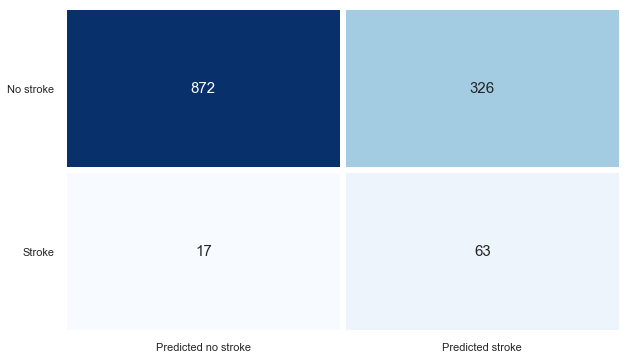

In [181]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

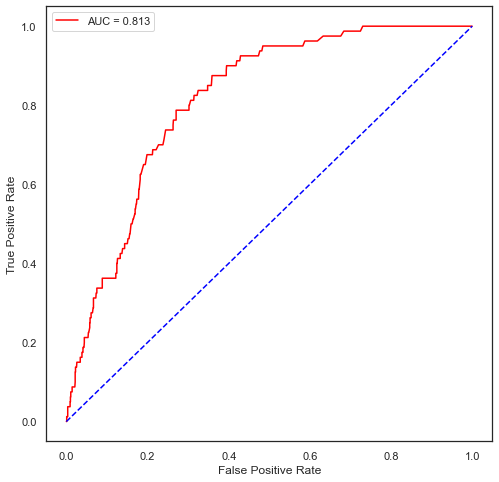

In [182]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'red', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## Gaussian NB

In [189]:
gauss = GaussianNB(var_smoothing=1.873817422860387e-09)
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
y_prob = gauss.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36      1198
         1.0       0.08      1.00      0.15        80

    accuracy                           0.27      1278
   macro avg       0.54      0.61      0.25      1278
weighted avg       0.94      0.27      0.34      1278

ROC AUC score: 0.8118948247078464
Accuracy Score:  0.2652582159624413


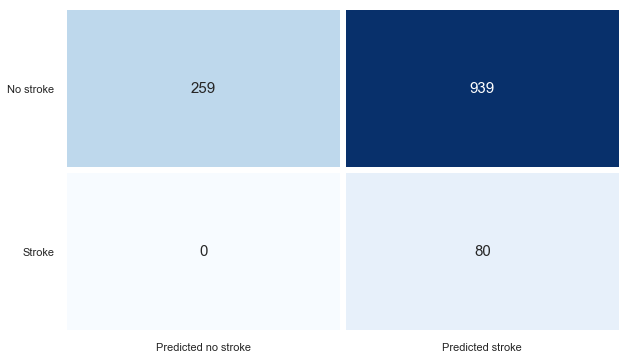

In [190]:
# Confusion Matrix
plt.figure(figsize = (10, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

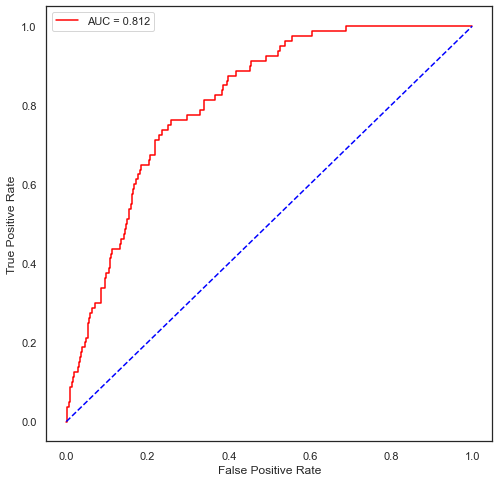

In [191]:
# ROC AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = 'red', label = 'AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

#### The best accuracy clearly goes to random forest, but in a real world situation we might want to focus on recall or f1 score. Gaussian might have the best recall, but Bernoulli seems to have the best balance between precision and recall. We are still misclassifying quite a few true negatives as false positives, but with the data we have available, perhaps this is the best we can do to predict stroke.